In [1]:
import cv2 # Import de OpenCV
import matplotlib.pyplot as plt # Import de matplotlib pour afficher les images
import numpy as np # Créer des matrices

# Afficher une image
Il faut savoir que les images sont des matrices 2D où Image(x,y) renvoit la couleur d'un pixel <br \>
Nous avons donc `Im[x,y] = [R,G,B]`où `R = red`, `G = green` et `B = blue`. Ainsi une image RGB est une matrice 3 dimensions <br \>

(300, 300, 3)


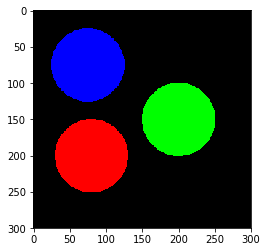

In [47]:
im = cv2.imread('../image/RGBCircles.bmp')
print(im.shape)
plt.imshow(im)
plt.show()

---
Attention !! La fonction `imread` d'OpenCV retourne une image `[B,G,R]`. Ainsi la fonction `imshow` de matplotlib interprète mal l'image et inverse le channel `R` et `B`.

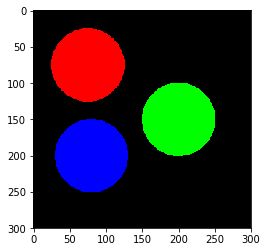

In [48]:
imRGB = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(imRGB)
plt.show()

# Image en niveau de gris
---
Une image en niveau de gris est une image 2D : `Im[x,y] = G`. <br \>
Nous pourrions définir une image en niveau de gris comme : `ImGray = (R+G+B)/3`. Cependant, il est plus intéressant de prendre en compte la sensibilité de l'oeil aux couleurs rouges, vertes et bleus.
![Image](../image/sensibilite.gif "icon")

Ainsi OpenCV attribue un poid selon les couleurs R,G,B : https://docs.opencv.org/4.0.0/de/d25/imgproc_color_conversions.html

(300, 300)


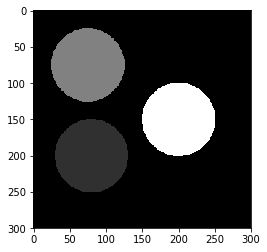

In [4]:
imGray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
print(imGray.shape)
plt.imshow(imGray, cmap="gray")
plt.show()

# Afficher un channel
---
Afficher un channel de couleur peut vous permettre de discriminer une caractéristique lors de la recherche d'objet.

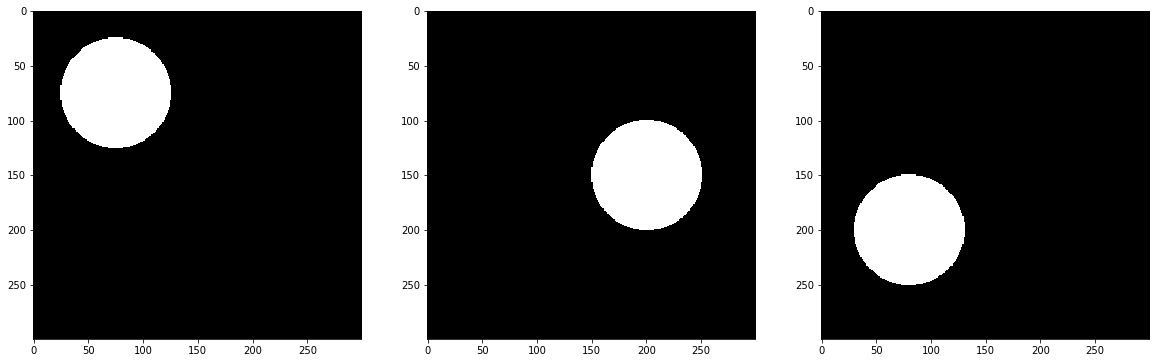

In [31]:
plt.figure(figsize=(20,20))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    plt.imshow(imRGB[:,:,i], cmap="gray")
plt.show()

# Histogramme
---
On peut afficher l'**histogramme** des images, comptabilisant le nombre de pixel par couleur. Ici nous l'affichons sur 255 bits puisque l'image est codé sur 8 bits, donc 2^8 couleurs. <br \>

La command `array.dtype` nous permet de connaitre le type de la matrice ainsi que le nombre de bit pour la coder.

Type de l'image : uint8


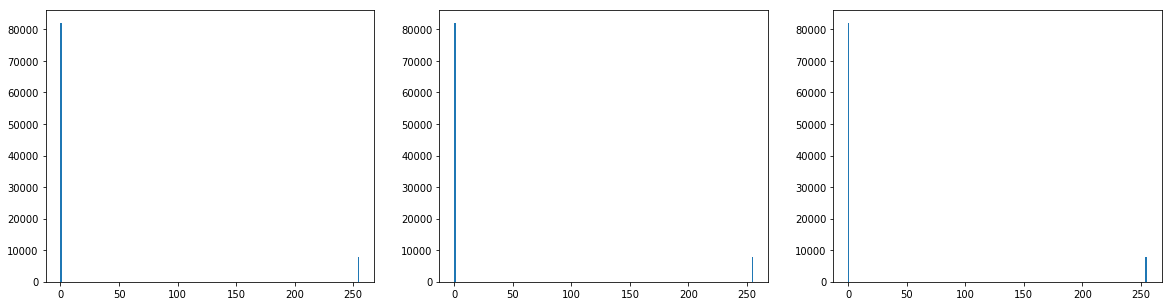

In [46]:
print("Type de l'image : " + str(imRGB.dtype))
plt.figure(figsize=(20,5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    plt.hist(imRGB[:,:,0].ravel(),255)
plt.show()

On peut donc voir que tous les pixels sont à `0` pour le fond noir est la couleur est à `255`.

# Trouver les cercles
---
Trouver un objet dans une image revient à trouver la zone où il se situe. Pour cela on peut indiquer si un pixel fait parti de l'objet cherché où non. Nous aurons donc une **matrice booléenne** avec False (0) ou True (1) pour chaque pixel.

Type de la matrice RedObject : bool


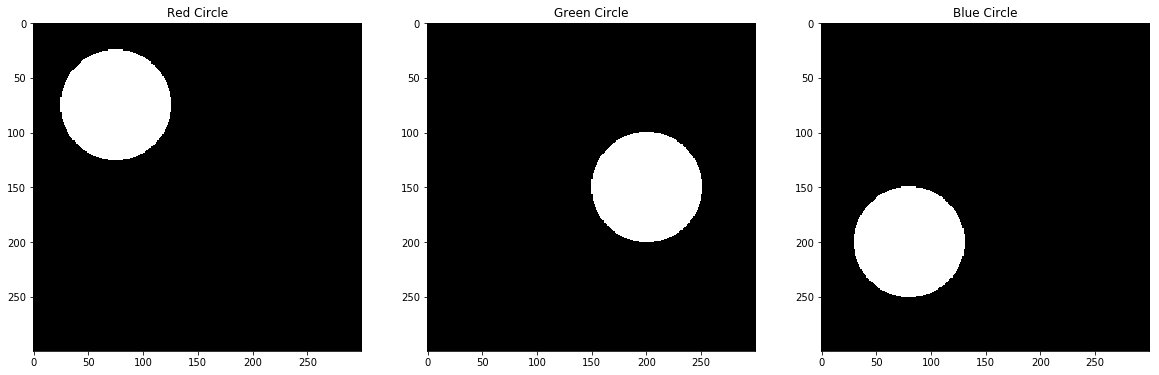

In [53]:
RedObject = imRGB[:,:,0]==255
GreenObject = imRGB[:,:,1]==255
BlueObject = imRGB[:,:,2]==255

print("Type de la matrice RedObject : " + str(RedObject.dtype))


f,ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(RedObject, cmap="gray")
ax[0].set_title('Red Circle')
ax[1].imshow(GreenObject, cmap="gray")
ax[1].set_title('Green Circle')
ax[2].imshow(BlueObject, cmap="gray")
ax[2].set_title('Blue Circle')

plt.show()